# 課題1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# parameter
a_c = 6.25             #台車駆動系のパラメータ
b_c = 4.36             #台車駆動系のパラメータ
m_p = 1.07 * 10 ** -1  #振り子の質量[kg]
l_p = 2.30 * 10 ** -1  #振り子の軸から重心までの長さ[m]
L_p = 3.80 * 10 ** -1  #振り子の全長[m]
J_p = 1.59 * 10 ** -3  #振り子の重心周りの慣性モーメント[kg m^2]
mu_p = 2.35 * 10 ** -4 #振り子の粘性摩擦係数 [kg m^2/s]
g = 9.81               #重力加速度[m/s^2]

# 丸め誤差対策
m_p = 1.07e-1
l_p = 2.3e-1
mu_p = 2.35e-4


## 台車の加速度を求める式

In [3]:
def Calculate_ddz(dz, v):
    '''
    dz : velocity
    v : control input
    ddz : acceleration
    '''
    return -a_c * dz + b_c * v

## 角加速度を求める式

In [4]:
def Calculate_ddq(dq, q, ddz):
  '''
  q : angle
  dq : angular velocity
  ddz : acceleration
  ddq : angular acceleration
  '''
  return (- mu_p * dq + m_p * g * l_p * np.sin(q) - m_p * l_p * np.cos(q) * ddz)/(J_p + m_p * l_p**2)

## 角度を制限 ($-\pi$～$\pi$) しないと一致する

In [5]:
# def radian(q):
#   #-pi ~ pi
#   return (q % (2 * np.pi)) if q % (2 * np.pi) <= np.pi else (q % (2 * np.pi)) - 2* np.pi
# def radian(q):
#   if np.abs(q) > np.pi:
#     print('Over')

# def radian(q):
#    return np.arctan2(np.sin(q), np.cos(q))

## オイラー法

In [6]:
#Euler method
def Euler(z, q, dz, dq, v):
  '''
  z : position
  q : angle
  dz : velosity
  dq : angulay velocity
  ddz : acceleration
  ddq : angular acceleration
  '''
  ddz = Calculate_ddz(dz,v)
  ddq = Calculate_ddq(dq, q, ddz)
  dz += ddz * h
  dq += ddq * h
  z += dz * h
  q += dq * h
  # q = radian(q)
  return z,q,dz,dq,ddz,ddq

## opt_ctrlを読み込み

In [7]:
opt_ctrl = np.genfromtxt('opt_ctrl.csv')

## メイン

In [8]:
# 初期値
q0 = np.pi
dq0 = 0.0
z0 = 0.0
dz0 = 0.0
# variable
q = q0    #angle
dq = dq0  #angular velocity
z = z0    #position
dz = dz0  #velocity
ddz = 0.0

h = 0.02  #step width
t = np.arange(0,10,h)

#logs
pos, vel, acc = [], [], []
ang, ang_vel, ang_acc = [], [], []

#loop 0~10s
for v in opt_ctrl:
  z,q,dz,dq,ddz,ddq = Euler(z,q,dz,dq,v)
  pos.append(z)
  ang.append(q)
  vel.append(dz)
  ang_vel.append(dq)
  acc.append(ddz)
  ang_acc.append(ddq)

## データセット読みこみ

In [9]:
opt_state = np.loadtxt('opt_state.csv')
opt_acc = np.loadtxt('opt_acc.csv')

## モデルから計算した状態と貰った状態を比較
- 青: モデルから計算した状態
- 橙: 権があげたデータ

一致しているように思える

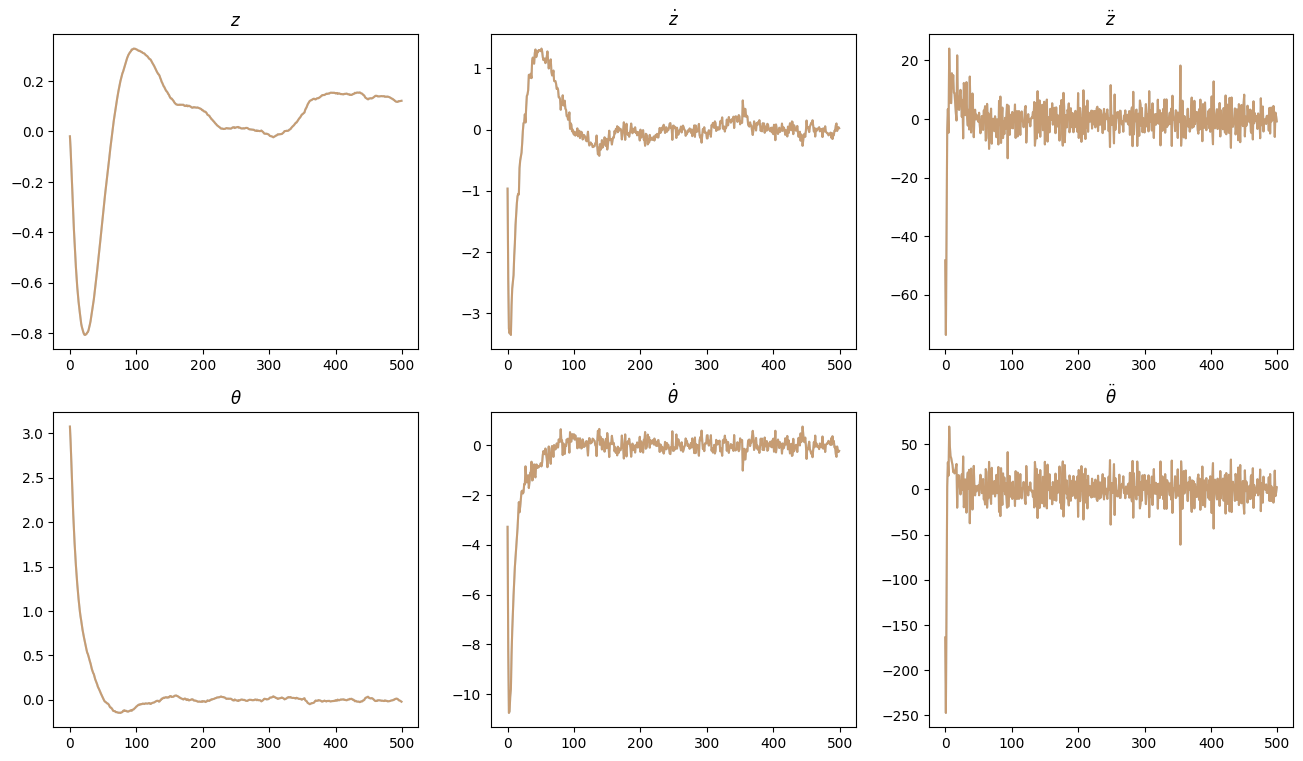

In [10]:
state_from_model = (pos, ang, vel, ang_vel, acc, ang_acc)
gt_state_list = np.concatenate([opt_state, opt_acc], -1).T
title_list = ['$z$', '$\\theta$', '$\dot{z}$', '$\dot{\\theta}$', '$\ddot{z}$', '$\ddot{\\theta}$']

fig, axs = plt.subplots(2, 3, figsize=(16, 9))

for i, (each_state, gt_state, title) in enumerate(zip(state_from_model, gt_state_list, title_list)):
  diff = each_state-gt_state
  ax = axs[i%2, i//2]
  ax.set_title(title)
  ax.plot(each_state, alpha=0.5)
  ax.plot(gt_state, alpha=0.5)
plt.show()


## 誤差を可視化

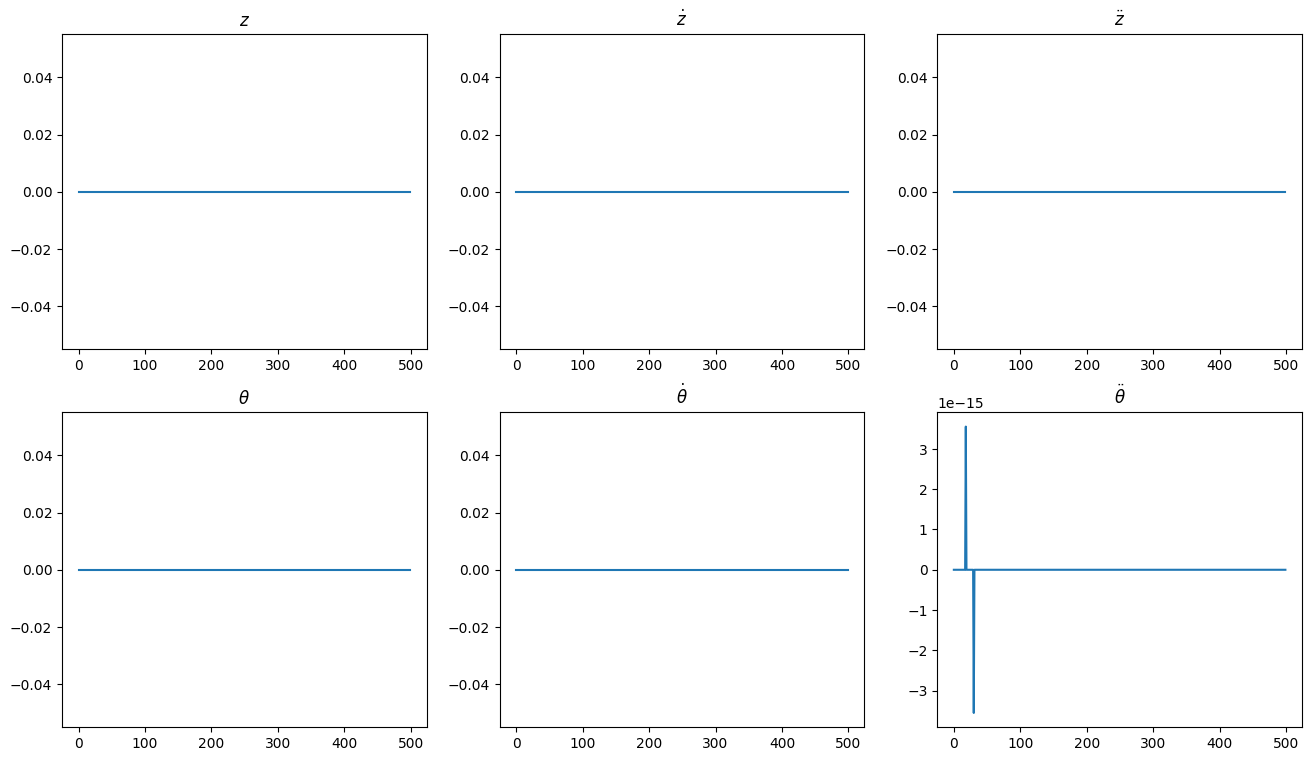

In [11]:
state_from_model = (pos, ang, vel, ang_vel, acc, ang_acc)
gt_state_list = np.concatenate([opt_state, opt_acc], -1).T
title_list = ['$z$', '$\\theta$', '$\dot{z}$', '$\dot{\\theta}$', '$\ddot{z}$', '$\ddot{\\theta}$']

fig, axs = plt.subplots(2, 3, figsize=(16, 9))

for i, (each_state, gt_state, title) in enumerate(zip(state_from_model, gt_state_list, title_list)):
  diff = each_state-gt_state
  ax = axs[i%2, i//2]
  ax.plot(diff)
  ax.set_title(title)
plt.show()

$\ddot{\theta}$にわずかな誤差があるのみ

## 角度制限をつけるとどうなるか (荒木君から貰ったやつ)

In [12]:
def radian(q):
  #-pi ~ pi
  return (q % (2 * np.pi)) if q % (2 * np.pi) <= np.pi else (q % (2 * np.pi)) - 2* np.pi

# def radian(q):
#    return np.arctan2(np.sin(q), np.cos(q))

#Euler method
def Euler(z, q, dz, dq, v):
  '''
  z : position
  q : angle
  dz : velosity
  dq : angulay velocity
  ddz : acceleration
  ddq : angular acceleration
  '''
  ddz = Calculate_ddz(dz,v)
  ddq = Calculate_ddq(dq, q, ddz)
  dz += ddz * h
  dq += ddq * h
  z += dz * h
  q += dq * h
  q = radian(q)
  return z,q,dz,dq,ddz,ddq

# 初期値
q0 = np.pi
dq0 = 0.0
z0 = 0.0
dz0 = 0.0
# variable
q = q0    #angle
dq = dq0  #angular velocity
z = z0    #position
dz = dz0  #velocity
ddz = 0.0

h = 0.02  #step width
t = np.arange(0,10,h)

#logs
pos, vel, acc = [], [], []
ang, ang_vel, ang_acc = [], [], []

#loop 0~10s
for v in opt_ctrl:
  z,q,dz,dq,ddz,ddq = Euler(z,q,dz,dq,v)
  pos.append(z)
  ang.append(q)
  vel.append(dz)
  ang_vel.append(dq)
  acc.append(ddz)
  ang_acc.append(ddq)

## モデルから生成した状態と貰ったデータを比較

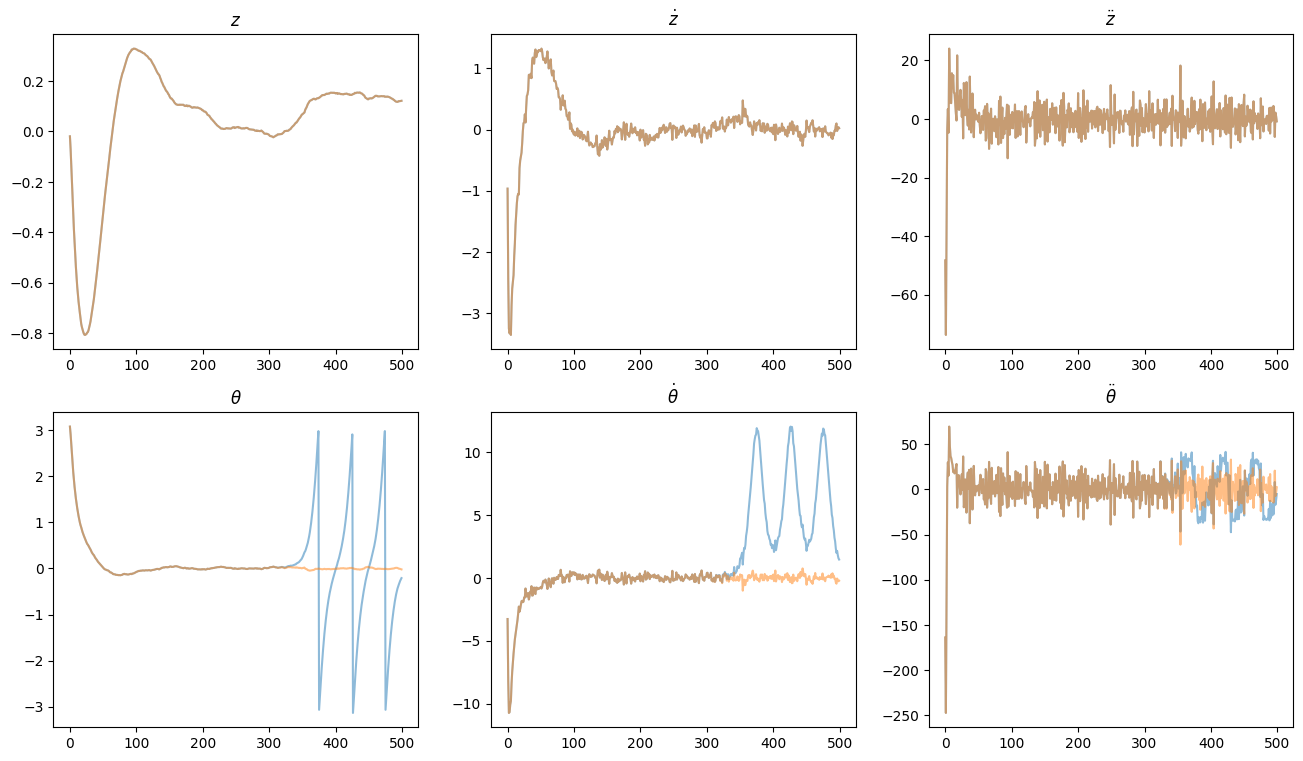

In [13]:
state_from_model = (pos, ang, vel, ang_vel, acc, ang_acc)
gt_state_list = np.concatenate([opt_state, opt_acc], -1).T
title_list = ['$z$', '$\\theta$', '$\dot{z}$', '$\dot{\\theta}$', '$\ddot{z}$', '$\ddot{\\theta}$']

fig, axs = plt.subplots(2, 3, figsize=(16, 9))

for i, (each_state, gt_state, title) in enumerate(zip(state_from_model, gt_state_list, title_list)):
  diff = each_state-gt_state
  ax = axs[i%2, i//2]
  ax.set_title(title)
  ax.plot(each_state, alpha=0.5)
  ax.plot(gt_state, alpha=0.5)
plt.show()


角度周りが途中でずれる

## 誤差を確認

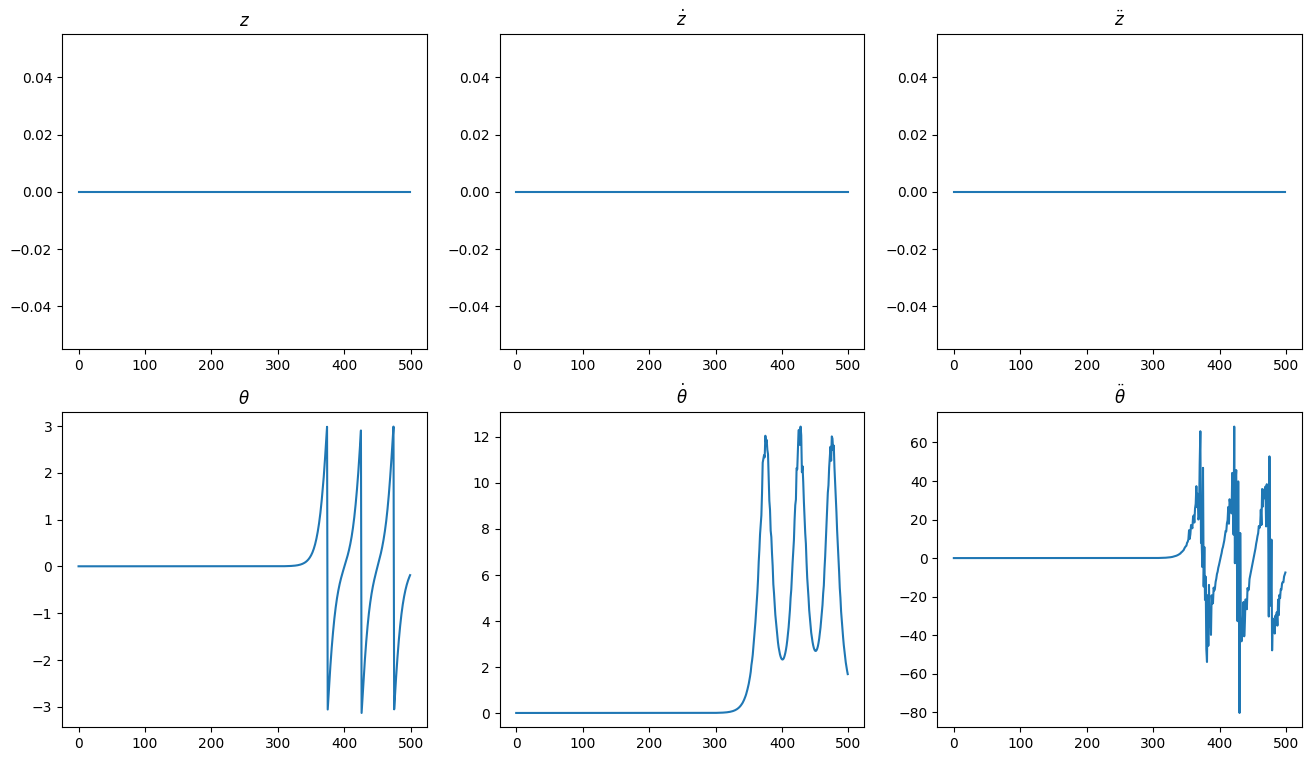

In [14]:
state_from_model = (pos, ang, vel, ang_vel, acc, ang_acc)
gt_state_list = np.concatenate([opt_state, opt_acc], -1).T
title_list = ['$z$', '$\\theta$', '$\dot{z}$', '$\dot{\\theta}$', '$\ddot{z}$', '$\ddot{\\theta}$']

fig, axs = plt.subplots(2, 3, figsize=(16, 9))

for i, (each_state, gt_state, title) in enumerate(zip(state_from_model, gt_state_list, title_list)):
  diff = each_state-gt_state
  ax = axs[i%2, i//2]
  ax.plot(diff)
  ax.set_title(title)
plt.show()

## 角度制限の関数が与える丸め誤差の影響について分析

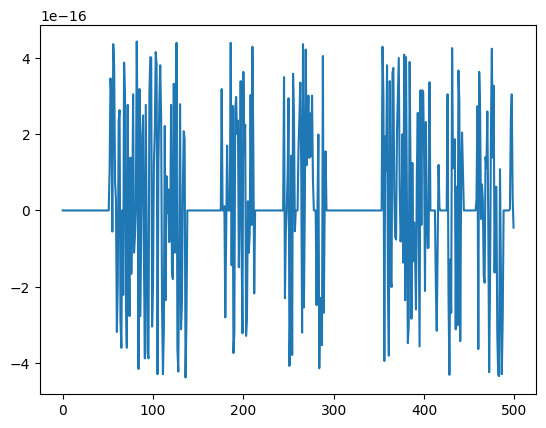

In [15]:
def radian(q):
  #-pi ~ pi
  return (q % (2 * np.pi)) if q % (2 * np.pi) <= np.pi else (q % (2 * np.pi)) - 2* np.pi

# def radian(q):
#    return np.arctan2(np.sin(q), np.cos(q))

def Euler(z, q, dz, dq, v):
  '''
  z : position
  q : angle
  dz : velosity
  dq : angulay velocity
  ddz : acceleration
  ddq : angular acceleration
  '''
  ddz = Calculate_ddz(dz,v)
  ddq = Calculate_ddq(dq, q, ddz)
  dz += ddz * h
  dq += ddq * h
  z += dz * h
  q += dq * h
  conv_q = radian(q)
  return z,q,dz,dq,ddz,ddq, conv_q

# 初期値
q0, dq0, z0, dz0 = np.pi, 0, 0, 0
# variable
q, dq, z, dz, ddz = q0, dq0, z0, dz0, 0.0

h = 0.02  #step width
t = np.arange(0,10,h)

#logs
ang = []
conv_ang_list = []

#loop 0~10s
for v in opt_ctrl:
  z,q,dz,dq,ddz,ddq, conv_ang = Euler(z,q,dz,dq,v)
  ang.append(q)
  conv_ang_list.append(conv_ang)

ang, conv_q_list = np.array(ang), np.array(conv_ang_list)
plt.plot(ang-conv_q_list)
plt.show()

radian()をかますことで丸め誤差が生じている

## もう少しマシなradian()を作る
演算子が増えると誤差も増えるので，radian()を再設計する

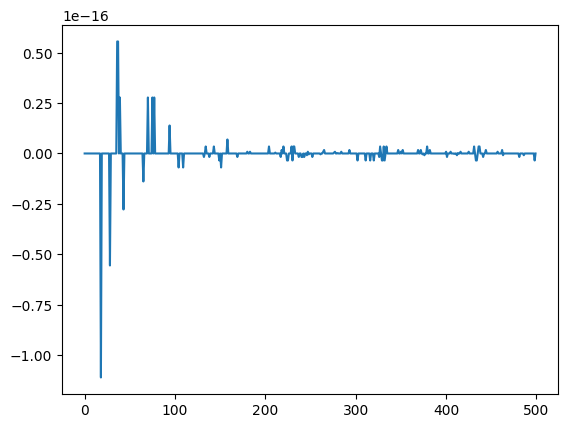

In [16]:
def radian(q):
  return np.arctan2(np.sin(q), np.cos(q))

def Euler(z, q, dz, dq, v):
  '''
  z : position
  q : angle
  dz : velosity
  dq : angulay velocity
  ddz : acceleration
  ddq : angular acceleration
  '''
  ddz = Calculate_ddz(dz,v)
  ddq = Calculate_ddq(dq, q, ddz)
  dz += ddz * h
  dq += ddq * h
  z += dz * h
  q += dq * h
  conv_q = radian(q)
  return z,q,dz,dq,ddz,ddq, conv_q

# 初期値
q0, dq0, z0, dz0 = np.pi, 0, 0, 0
# variable
q, dq, z, dz, ddz = q0, dq0, z0, dz0, 0.0

h = 0.02  #step width
t = np.arange(0,10,h)

#logs
ang = []
conv_ang_list = []

#loop 0~10s
for v in opt_ctrl:
  z,q,dz,dq,ddz,ddq, conv_ang = Euler(z,q,dz,dq,v)
  ang.append(q)
  conv_ang_list.append(conv_ang)

ang, conv_q_list = np.array(ang), np.array(conv_ang_list)
plt.plot(ang-conv_q_list)
plt.show()

上と比べると誤差が少なそう．試しに貰ったデータと比較してみる

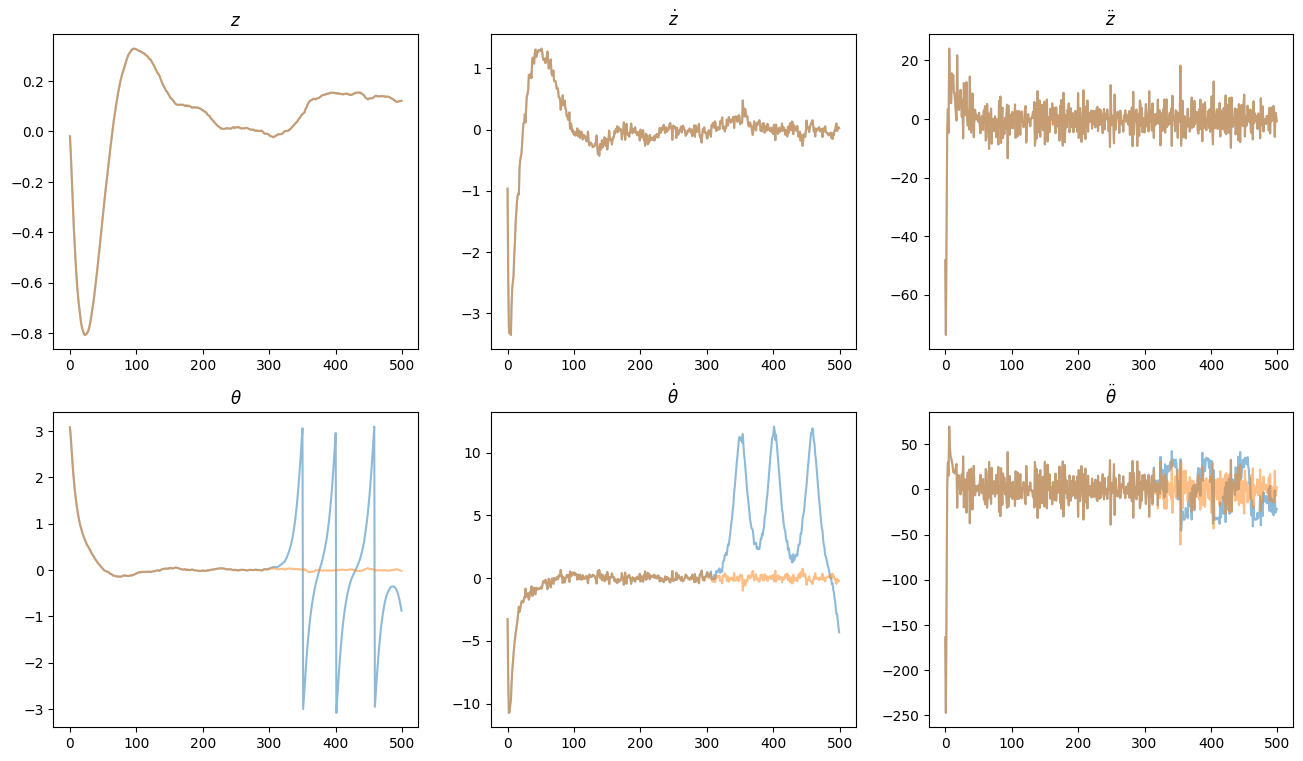

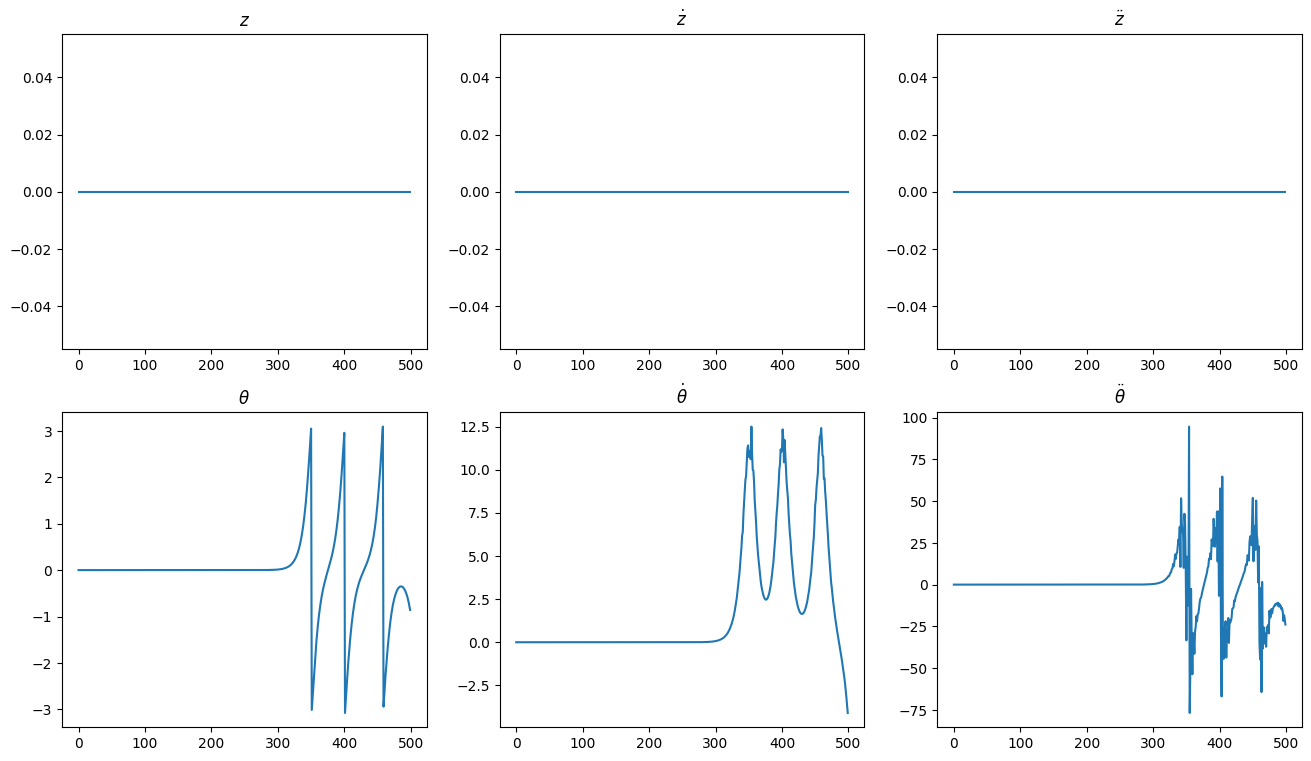

In [17]:
def radian(q):
  return np.arctan2(np.sin(q), np.cos(q))

def Euler(z, q, dz, dq, v):
  '''
  z : position
  q : angle
  dz : velosity
  dq : angulay velocity
  ddz : acceleration
  ddq : angular acceleration
  '''
  ddz = Calculate_ddz(dz,v)
  ddq = Calculate_ddq(dq, q, ddz)
  dz += ddz * h
  dq += ddq * h
  z += dz * h
  q += dq * h
  q = radian(q)
  return z,q,dz,dq,ddz,ddq

# 初期値
q0, dq0, z0, dz0 = np.pi, 0, 0, 0
# variable
q, dq, z, dz, ddz = q0, dq0, z0, dz0, 0.0

h = 0.02  #step width
t = np.arange(0,10,h)

pos, vel, acc = [], [], []
ang, ang_vel, ang_acc = [], [], []

#loop 0~10s
for v in opt_ctrl:
  z,q,dz,dq,ddz,ddq = Euler(z,q,dz,dq,v)
  pos.append(z)
  ang.append(q)
  vel.append(dz)
  ang_vel.append(dq)
  acc.append(ddz)
  ang_acc.append(ddq)

state_from_model = (pos, ang, vel, ang_vel, acc, ang_acc)
gt_state_list = np.concatenate([opt_state, opt_acc], -1).T
title_list = ['$z$', '$\\theta$', '$\dot{z}$', '$\dot{\\theta}$', '$\ddot{z}$', '$\ddot{\\theta}$']

fig, axs = plt.subplots(2, 3, figsize=(16, 9))

for i, (each_state, gt_state, title) in enumerate(zip(state_from_model, gt_state_list, title_list)):
  diff = each_state-gt_state
  ax = axs[i%2, i//2]
  ax.set_title(title)
  ax.plot(each_state, alpha=0.5)
  ax.plot(gt_state, alpha=0.5)
plt.show()


fig, axs = plt.subplots(2, 3, figsize=(16, 9))
for i, (each_state, gt_state, title) in enumerate(zip(state_from_model, gt_state_list, title_list)):
  diff = each_state-gt_state
  ax = axs[i%2, i//2]
  ax.plot(diff)
  ax.set_title(title)
plt.show()

厳しい

## 結論
- 角度変換をかますと丸め誤差の影響を大きく受ける．
- $-\pi$と$\pi$の不連続を避けるために，MLPの入力として$\theta$を$\cos(\theta)$と$\sin(\theta)$に分けて与えることがある．